In [1]:
#Clustering
#Burada kümelenmiş bir durum yok

In [3]:
#Türler arasında yakınlık ilişkileri aramaya çalışıyoruz.


In [5]:
""" 
1-Centroid-Based Clustering -> K-means
küme mantığı, her kümenin centroid denen bir ortası var. bu orta noktaların centroidin sınırlarına olan mesafesini ölçüyoruz.
K değeri küme sayısını ifade eder. Kaç K'ya ayıracağız ? bunu çözmemiz lazım
"""

' \n1-Centroid-Based Clustering -> K-means\nküme mantığı, her kümenin centroid denen bir ortası var. bu orta noktaların centroidin sınırlarına olan mesafesini ölçüyoruz.\n'

In [6]:
""" 
2-Hierarchical Clustering -> Amacımız classların doğru adedini bulmak, her bir veri noktası class'dır ve o mesafe belli yerlerde açılıp kapanana kadar 
devam eder.
2 yapısı var.Bunlar;
1-Divisive
2-Agglomerative

"""

" \n2-Hierarchical Clustering -> Amacımız classların doğru adedini bulmak, her bir veri noktası class'dır ve o mesafe belli yerlerde açılıp kapanana kadar \ndevam eder.\n2 yapısı var.Bunlar;\n1-Divisive\n2-Agglomerative\n\n"

In [7]:
"""  
3-Density Models ->Veri uzayı içerisinde arama yaparken verilerin yoğunluk durumuna göre bakıyoruz.
DBSCAN ve OPTICS olmak üzere 2 algoritması var.

"""

'  \n3-Density Models ->Veri uzayı içerisinde arama yaparken verilerin yoğunluk durumuna göre bakıyoruz.\nDBSCAN ve OPTICS olmak üzere 2 algoritması var.\n\n'

In [8]:
#K-Means(Centroid Based Clustering)

In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

C:\Users\atakan.kececi\AppData\Local\Temp\ipykernel_17568\2129955256.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [11]:
dataset = pd.read_csv(r'C:\Users\atakan.kececi\Desktop\AI_Calismalar\datas\Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
X = dataset.iloc[:,3:]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


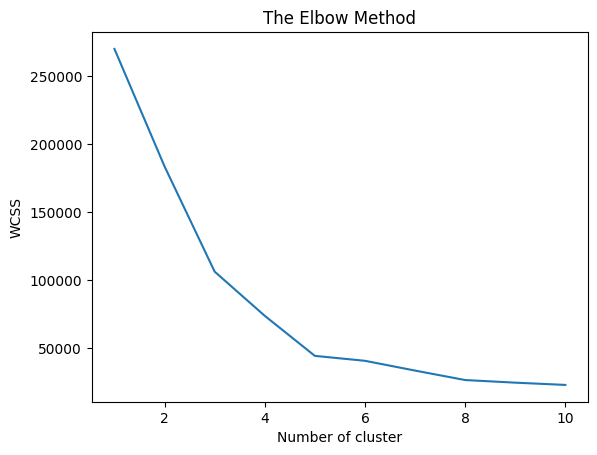

In [14]:
#Dirsek (Elbow) Metodu
from sklearn.cluster import KMeans
wcss = [] #within cluster sum of squared error
for i in range(1,11):
    kmeans = KMeans(n_clusters=i , init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #hataları burada wcss'e attık, buradaki inertia hatayı hesaplayan kısım

plt.plot(range(1,11),wcss)    
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [15]:
#Dirsek noktası 5 gibi görünüyor. K=5 olarak kabul edelim


In [16]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(X)


In [17]:
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [18]:
#Datalar 5 adet sınıfa ayrılmış oldu

In [19]:
test = kmeans.predict([[15,#Annual Income(k$)
                        39, #Spending Score(1-100)
                        ]])
print('Bu nokta',test[0],'numaralı kümeye aittir.')

Bu nokta 4 numaralı kümeye aittir.


C:\Users\atakan.kececi\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [20]:
#Yukarıdaki arrayde 4 olduğunu gördük

In [22]:
X[y_kmeans == 0].head(10)

,Annual Income (k$),Spending Score (1-100)
43,39,61
46,40,55
47,40,47
48,40,42
49,40,42
50,42,52
51,42,60
52,43,54
53,43,60
54,43,45


In [23]:
#Küme sayısı 0 olan kümelerdir.

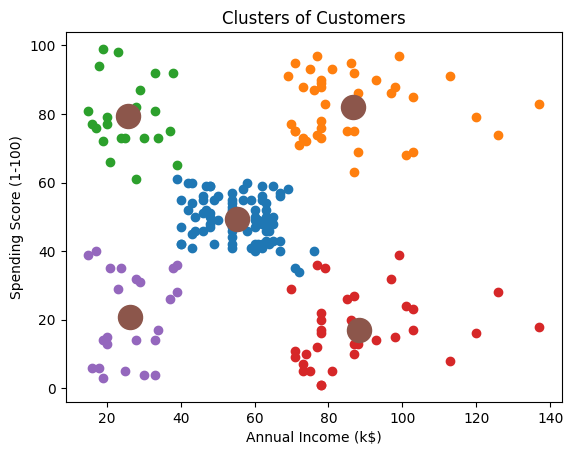

In [30]:
plt.scatter(X[y_kmeans == 0]['Annual Income (k$)'],X[y_kmeans == 0]['Spending Score (1-100)'], label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['Annual Income (k$)'],X[y_kmeans == 1]['Spending Score (1-100)'], label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2]['Annual Income (k$)'],X[y_kmeans == 2]['Spending Score (1-100)'], label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3]['Annual Income (k$)'],X[y_kmeans == 3]['Spending Score (1-100)'], label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4]['Annual Income (k$)'],X[y_kmeans == 4]['Spending Score (1-100)'], label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300,label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend
plt.show()

In [28]:
plt.bar

<function matplotlib.pyplot.bar(x: 'float | ArrayLike', height: 'float | ArrayLike', width: 'float | ArrayLike' = 0.8, bottom: 'float | ArrayLike | None' = None, *, align: "Literal['center', 'edge']" = 'center', data=None, **kwargs) -> 'BarContainer'>

In [33]:
#Çok fazla küme olduğunda K-Means çok daha hızlı çlışır.Ancak olabildiğince K sayısını az tutmamız gerekir.
#Hiyerarşik küme ile arasındaki fark kümelerin daha sıkı olmasıdır.
#En büyük dezavantajlardan biri K değerini tahmin etmenin zor olmasıdır.
#Yoğunluk değiştiği sürece istenen şekilde çalışmayabilir.

In [34]:
#2-Hierarchical Clustering 
#2.1-Agglomerative : Bottom-Up
        #Divise : Top - Down   

In [35]:
#Agglomerative için

In [36]:
customer_data = pd.read_csv(r'C:\Users\atakan.kececi\Desktop\AI_Calismalar\datas\Mall_Customers.csv')
customer_data.shape

(200, 5)

In [37]:
customer_data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [39]:
data = customer_data.iloc[:,3:5]
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [40]:
data = customer_data.iloc[:,3:5].values

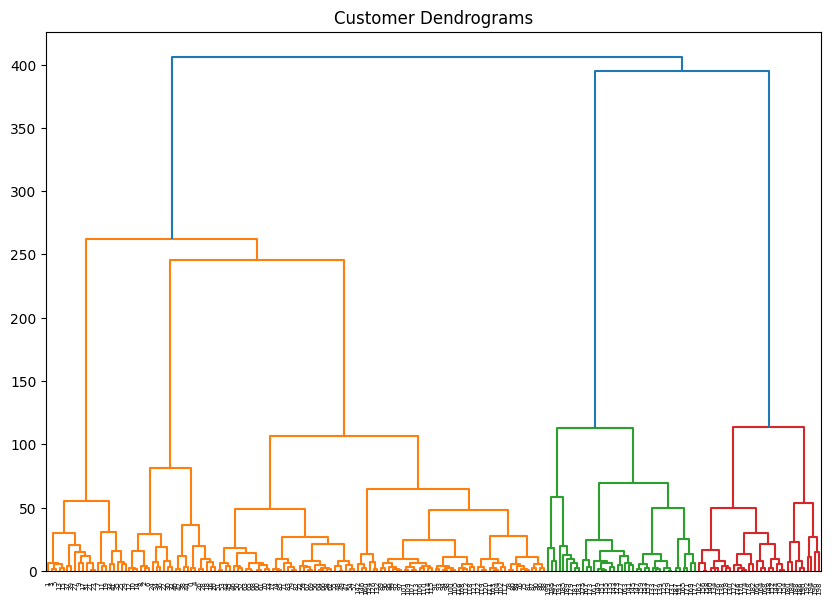

In [41]:
import scipy.cluster.hierarchy as shc 
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(data,method='ward'))

In [42]:
#Buradaki cluster sayısını tespit etmek için kullanılan yöntemlerden biri ortadan bir çizgi çekmek ve temas ettiği noktaları saymak olabilir.
#Dokunduğu nokta sayısı 5'dir.

In [45]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

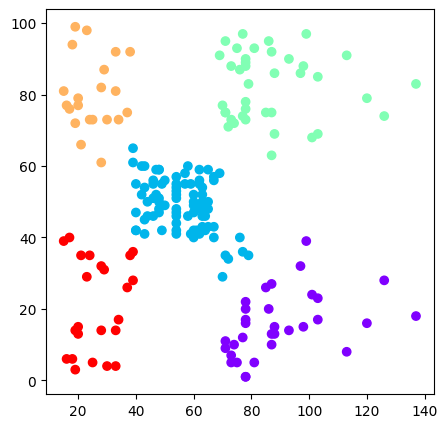

In [46]:
plt.figure(figsize=(5,5))
plt.scatter(data[:,0],data[:,1],c=cluster.labels_,cmap = 'rainbow')
plt.show()